# TIM - TP3 : Filtering

For this session, we're continuing to look at pre-processing algorithms. Today, we'll be developing several classic filtering algorithms.

But first, we'll stick to our usual routine: we'll import the libraries we need for this tutorial and define the path to our image database.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

path_base = "/content/drive/MyDrive/Colab Notebooks/M1_DSAI_IAwAtSI_PW1/Base_images/lena_gray.tif"

Then load the black & white image you'd like to use for this test.

/!\ : We need a black and white image, with only one channel (2D matrix).

In [4]:
# To be completed
# Upload image of your choice (B&W)
img = cv2.imread(path_base, -1)

print(img.ndim)

2


## Ex. 1 : Image sound effects

That's right! Before filtering an image, we'll first review a few types of noise and implement functions to apply artificial noise to our image.

**1.**

Start by implementing a function to generate p percent uniform black & white (salt & pepper) noise on an image.

*_A reminder: it's best to avoid loops ;)_*

In [5]:
# To be completed
# Development of the Salt and Pepper noise generation function
import random

def add_salt_and_pepper_noise(image, p):
  noise_matrix = np.random.choice([0, 255, None], size=image.shape, p=[p / (100 * 2), p / (100 * 2), 1 - p / 100])
  img_noisy = np.where(noise_matrix == None, image, noise_matrix)

  return img_noisy.astype(np.uint8)

Apply 3% S&P noise to the image you wanted to process today, and display it.

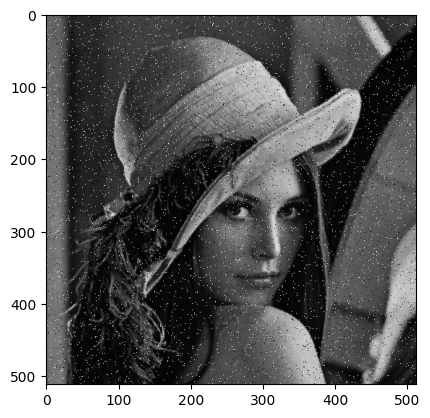

In [6]:
# To be completed
# Image sound effects with salt & pepper noise
lena_gray_noisy = add_salt_and_pepper_noise(img, 3)
# Display image with noise
plt.imshow(lena_gray_noisy, cmap='gray')

**2.**

Now implement a function to generate Gaussian noise of mean *mean* and standard deviation *std* on an image.

In [59]:
# To be completed
# Development of the Gaussian noise generation function
def add_gaussian_noise(image, mean, std):
  noise_matrix = np.random.normal(mean, std, image.shape)
  img_noisy = np.clip(image + noise_matrix, 0, 255)

  return img_noisy.astype(np.uint8)

Apply Gaussian noise of mean 0 and standard deviation 5 to the image you wanted to process today, and display it.

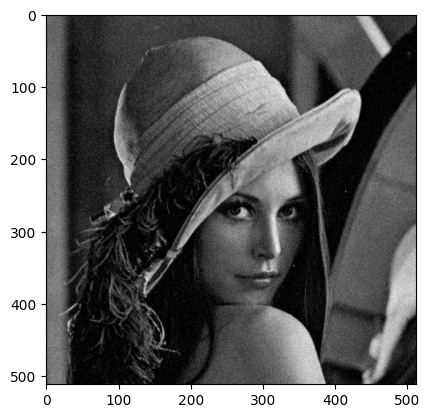

In [61]:
# To be completed
# Image noise with Gaussian noise
lena_gray_noisy = add_gaussian_noise(img, -5, 10)
# Display noisy image
plt.imshow(lena_gray_noisy, cmap='gray')

## Ex. 2: Let's move on to filtering!

Now that we've got noisy images, we're going to filter them ;) So we're going to develop several filtering algorithms seen in class :D

**1.**

Implement an averaging filter function of size *nxn* with *n* odd.

In [9]:
# To be completed
# Development of the averaging filter function
def apply_averaging_filter(image, n):
  if (n % 2 == 0):
    print("n must be odd")
    return image

  k = np.ones((n, n)) / (n * n)
  img_filtered = cv2.filter2D(image, -1, k)

  return img_filtered

Display the result of applying the averaging filter to the S&P noisy image.

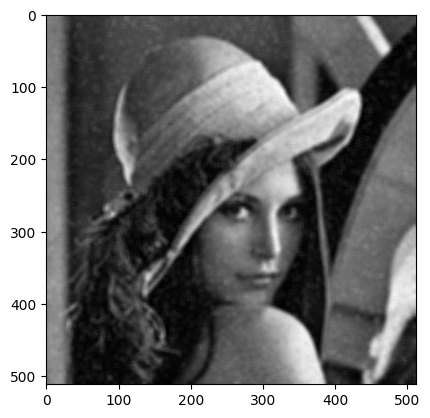

In [11]:
# To be completed
# Display outgoing image
lena_gray_noisy = add_salt_and_pepper_noise(img, 3)
lena_gray_noisy_filtered = apply_averaging_filter(lena_gray_noisy, 7)

plt.imshow(lena_gray_noisy_filtered, cmap='gray')

**2.**

Now implement a median filter function of size *_nxn_* with *n* odd.

In [12]:
# To be completed
# Development of the median filter function
def apply_median_filter(image, n):
  if (n % 2 == 0):
    print("n must be odd")
    return image

  img_filtered = cv2.medianBlur(image, n)

  return img_filtered

Display the result of applying the median filter to the S&P noise image.

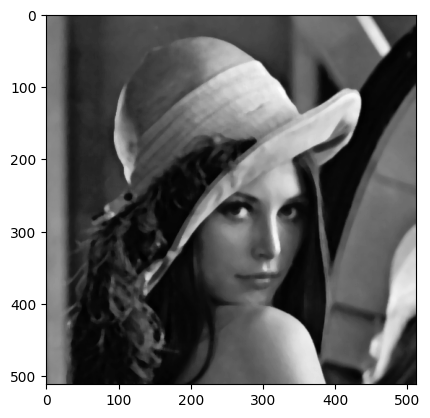

In [15]:
# To be completed
# Display outgoing image
lena_gray_noisy = add_salt_and_pepper_noise(img, 3)
lena_gray_noisy_filtered = apply_median_filter(lena_gray_noisy, 7)

plt.imshow(lena_gray_noisy_filtered, cmap='gray')

**3.**
Let's move on to Gaussian filtering! Here, too, we'll perform a function and time/display the result, but first let's move on to a more theoretical explanation.

For this type of filter, we'll apply a convolution from a convolution mask *_h_*. For an image *_A_*, with the mask *_h_*, the output result is :
\begin{equation*}
    C[i,j] = \sum_{k \in W} \sum_{l \in W} h[k,l]A[i-k,j-l]
\end{equation*}
A pixel *_A[i,j]_* is replaced by a weighted sum of itself and the pixels in its neighborhood *_W_*.

In the previous case of the averaging filter, this is equivalent to convolving *_h_* of size $n \times n$:
\begin{equation*}
    h =
    \begin{vmatrix}
        1/n & \cdots & 1/n \\
        \vdots & \ddots & \vdots \\
        1/n & \cdots & 1/n
    \end{vmatrix}
\end{equation*}

For the Gaussian filter, the convolution mask will take the following form:

\begin{equation*}
    h(x,y) = \frac{1}{2 \pi \sigma^{2}} exp(-\frac{(x^{2}+y^{2})}{2 \sigma^{2}})
\end{equation*}

Now, for the Gaussian filter, we'll define the masks ourselves, which are a rounding of the formula. For example, the following mask you'll create is an approximation with $\sigma = 0.8$ for a mask of size $3x3$.
\begin{equation*}
    h = \frac{1}{16}
        \begin{vmatrix}
        1 & 2 & 1 \\
        2 & 4 & 2 \\
        1 & 2 & 1
        \end{vmatrix}
\end{equation*}

In [45]:
# To be completed
# Convolution mask creation for Gaussian filtering
h = 1 / 16 * np.array([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1]
], dtype=np.float32)

Expand the convolution function with mask h to perform Gaussian filtering.

In [54]:
# To be completed
# Implementation of the convolution function
def apply_gaussian_filtering(image, kernel):
  padding = kernel.shape[0] // 2
  padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='reflect')
  image_to_return = np.zeros_like(image, dtype=np.float32)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      region = padded_image[y:y + kernel.shape[0], x:x + kernel.shape[1]]
      image_to_return[y, x] = np.sum(region * kernel)
  return np.clip(image_to_return, 0, 255).astype(np.uint8)

Display the result of applying the convolution with the Gaussian kernel to the Gaussian noise image.

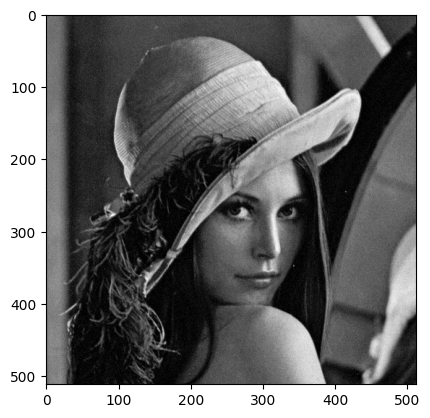

In [62]:
# To be completed
# Display outgoing image
lena_gray_noisy = add_gaussian_noise(img, 0, 5)
lena_gray_noisy_filtered = apply_gaussian_filtering(lena_gray_noisy, h)

plt.imshow(lena_gray_noisy, cmap='gray')

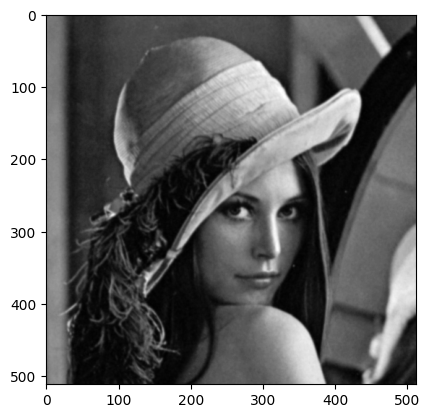

In [63]:
plt.imshow(lena_gray_noisy_filtered, cmap='gray')

**4.**


Now, just one more filter to develop! And it's going to be very quick ;)

Let's move on to the exponential filter. Same principle as before: a convolution with a mask of this type :
\begin{equation*}
    h(x,y) = \frac{\gamma^{2}}{4}exp(-\gamma(|x|+|y|))
\end{equation*}

For this last filter, create the following mask :
\begin{equation*}
    h = \frac{1}{80}
        \begin{vmatrix}
        1 & 1 & 3 & 1 & 1 \\
        1 & 3 & 7 & 3 & 1 \\
        3 & 7 & 16 & 7 & 3 \\
        1 & 3 & 7 & 3 & 1 \\
        1 & 1 & 3 & 1 & 1 \\
        \end{vmatrix}
\end{equation*}

In [48]:
# To be completed
# Creation of the convolution mask for exponential filtering
h = 1 / 80 * np.array([
  [1, 1, 3, 1, 1],
  [1, 3, 7, 3, 1],
  [3, 7, 16, 7, 3],
  [1, 3, 7, 3, 1],
  [1, 1, 3, 1, 1],
], dtype=np.float32)

Display the result of applying the convolution with the exponential kernel to the noisy Gaussian image.

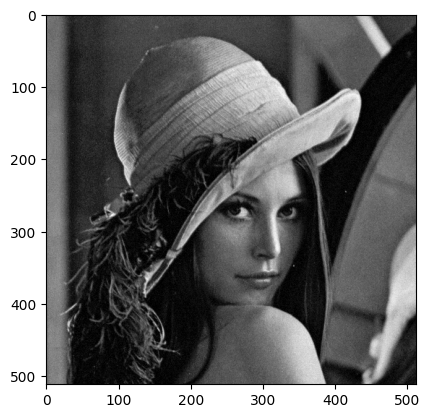

In [64]:
# To be completed
# Display outgoing image
# To be completed
# Display outgoing image
lena_gray_noisy = add_gaussian_noise(img, 0, 5)
lena_gray_noisy_filtered = apply_gaussian_filtering(lena_gray_noisy, h)

plt.imshow(lena_gray_noisy, cmap='gray')

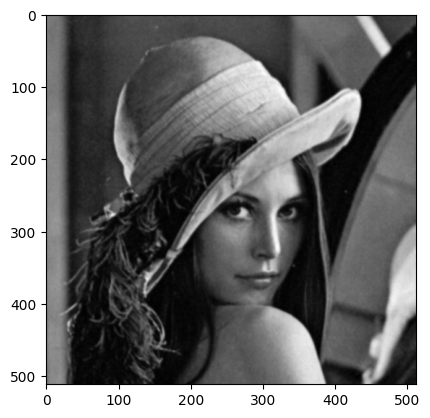

In [65]:
plt.imshow(lena_gray_noisy_filtered, cmap='gray')

## Ex. 3: How about analyzing the effects obtained after filtering?

For now, we've created 2 noisy images and created 3 filter functions (mean, median and convolution for Gaussian and exponential filtering). However, it's important to analyze the results we've obtained, and not just apply the filters to the images without a second thought...

To do this, create 2 lists of noisy images from your original image: one with P&S noisy images with variable percentage, and one with Gaussian noisy images with variable mean *mean* and standard deviation *std*.

In [69]:
# To be completed
# Creating lists of noisy images
def generate_images_s_p(image, ps):
  noisy_images = []
  for p in ps:
      noisy_image = add_salt_and_pepper_noise(image, p)
      noisy_images.append(noisy_image)
  return noisy_images

def generate_images_gaussian(image, means, stds):
  noisy_images = []
  for mean in means:
      for std in stds:
          noisy_image = add_gaussian_noise(image, mean, std)
          noisy_images.append(noisy_image)
  return noisy_images

s_p_noisy_images = generate_images_s_p(img, [5, 10, 15])
gaussian_noisy_images = generate_images_gaussian(img, [0, 5, 10], [5, 10, 20])


# Display S&P noisy images
print('S&P')
for _, noisy_img in enumerate(s_p_noisy_images):
  plt.imshow(noisy_img, cmap="gray")
  plt.show()

# Display Gaussian noisy images
print('GAUSSIAN')
for _, noisy_img in enumerate(gaussian_noisy_images):
  plt.imshow(noisy_img, cmap="gray")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Develop a function to calculate the total error L1 between 2 images A and B, in this case the average of the absolute values of the differences of the N pixels:
\begin{equation*}
    error L1 = \frac{\sum_{i,j} |A[i,j]-B[i,j]|}{N}
\end{equation*}

In [ ]:
# To be completed
# Total error calculation function L1


**_Bonus :_** If you wish, you can also create a function to calculate the total error L2 between 2 images A and B, i.e. the average of the differences between the N pixels squared:

\begin{equation*}
    error L2 = \frac{\sum_{i,j} (A[i,j]-B[i,j])^{2}}{N}
\end{equation*}

In [ ]:
# To be completed as a bonus
# Function for calculating the total error L2
...

Ok, now we've got our noisy images, our filter functions and our error calculation function.
It's time to analyze the effects of filtering on noisy images (from a matrix point of view, but also from a visual point of view and also from a chronometric point of view). Choose one of the 4 filters (Mean, Median, Gaussian, Exponential) and experiment, to explain the effects of this filter (advantages and disadvantages).

*_Note:_* For all those who want to analyze a convolution filter, I strongly advise you to abandon your convolution function and use OpenCV's filter2D function, which takes your image and mask as parameters. For further information: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d

In [ ]:
# To be completed
# Analysis of the impact of the chosen filter on noisy images
...

**Selected filter:_**

**Analysis of selected filter:_**